# Image Corpus Creation and Binary Classification using DNN

### Suriya S (225229140)

### Steps 1- Dataset Creation:

Dataset is created.

### Steps 2- Pre-Processing:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

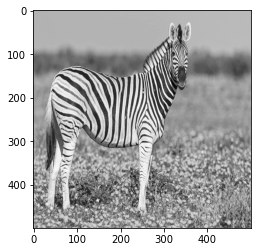

In [52]:
datadir ="Image"
categories =['Zebra']

for category in categories:
    path = os.path.join(datadir,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

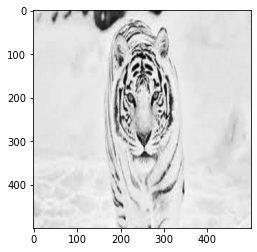

In [3]:
datadir ='Image'
categories =['Tiger']

for category in categories:
    path = os.path.join(datadir,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

### Steps 3- Dataset Preparation:

In [4]:
training_data = []
img_size=500

def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()

In [5]:
print(len(training_data))

10


In [6]:
x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

### Step 4 - Model Creation:

In [8]:
from keras.models import Sequential
from keras.layers.core import Dense

In [9]:
model =Sequential()
model.add(Dense(8,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])

In [11]:
hisotry=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)

Epoch 1/100
1/1 - 4s - loss: 0.0095 - binary_accuracy: 1.0000 - val_loss: 0.0027 - val_binary_accuracy: 1.0000 - 4s/epoch - 4s/step
Epoch 2/100
1/1 - 1s - loss: 0.0093 - binary_accuracy: 1.0000 - val_loss: 0.0025 - val_binary_accuracy: 1.0000 - 759ms/epoch - 759ms/step
Epoch 3/100
1/1 - 1s - loss: 0.0092 - binary_accuracy: 1.0000 - val_loss: 0.0024 - val_binary_accuracy: 1.0000 - 732ms/epoch - 732ms/step
Epoch 4/100
1/1 - 1s - loss: 0.0090 - binary_accuracy: 1.0000 - val_loss: 0.0023 - val_binary_accuracy: 1.0000 - 698ms/epoch - 698ms/step
Epoch 5/100
1/1 - 1s - loss: 0.0089 - binary_accuracy: 1.0000 - val_loss: 0.0022 - val_binary_accuracy: 1.0000 - 722ms/epoch - 722ms/step
Epoch 6/100
1/1 - 1s - loss: 0.0087 - binary_accuracy: 1.0000 - val_loss: 0.0022 - val_binary_accuracy: 1.0000 - 686ms/epoch - 686ms/step
Epoch 7/100
1/1 - 1s - loss: 0.0086 - binary_accuracy: 1.0000 - val_loss: 0.0021 - val_binary_accuracy: 1.0000 - 686ms/epoch - 686ms/step
Epoch 8/100
1/1 - 1s - loss: 0.0084 - bi

In [12]:
model.evaluate(x_train,y_train)

1/1 [==============================] - 0s 293ms/step - loss: 0.0037 - binary_accuracy: 1.0000


[0.0036764522083103657, 1.0]

### Step 5 - Performance Analysis:

In [13]:
# model 1
model =Sequential()
model.add(Dense(16,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
1/1 - 2s - loss: 0.9832 - binary_accuracy: 9.5029e-04 - val_loss: 0.9979 - val_binary_accuracy: 1.3467e-04 - 2s/epoch - 2s/step
Epoch 2/100
1/1 - 1s - loss: 0.9828 - binary_accuracy: 9.5029e-04 - val_loss: 0.9978 - val_binary_accuracy: 1.3467e-04 - 1s/epoch - 1s/step
Epoch 3/100
1/1 - 1s - loss: 0.9825 - binary_accuracy: 9.5029e-04 - val_loss: 0.9977 - val_binary_accuracy: 1.3467e-04 - 713ms/epoch - 713ms/step
Epoch 4/100
1/1 - 1s - loss: 0.9821 - binary_accuracy: 9.5029e-04 - val_loss: 0.9976 - val_binary_accuracy: 1.3467e-04 - 963ms/epoch - 963ms/step
Epoch 5/100
1/1 - 1s - loss: 0.9818 - binary_accuracy: 9.5029e-04 - val_loss: 0.9975 - val_binary_accuracy: 1.3467e-04 - 957ms/epoch - 957ms/step
Epoch 6/100
1/1 - 1s - loss: 0.9814 - binary_accuracy: 9.5029e-04 - val_loss: 0.9974 - val_binary_accuracy: 1.3467e-04 - 907ms/epoch - 907ms/step
Epoch 7/100
1/1 - 1s - loss: 0.9810 - binary_accuracy: 9.5029e-04 - val_loss: 0.9973 - val_binary_accuracy: 1.3467e-04 - 862ms/epoch - 8

In [14]:
model.evaluate(x_train,y_train)

1/1 [==============================] - 0s 366ms/step - loss: 0.0062 - binary_accuracy: 1.0000


[0.006206875201314688, 1.0]

In [15]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 169ms/step - loss: 0.0016 - binary_accuracy: 1.0000


[0.0015500709414482117, 1.0]

In [16]:
# model 2
model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
1/1 - 3s - loss: 0.0017 - binary_accuracy: 1.0000 - val_loss: 1.6822e-04 - val_binary_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 2/100
1/1 - 1s - loss: 0.0017 - binary_accuracy: 1.0000 - val_loss: 1.6449e-04 - val_binary_accuracy: 1.0000 - 1s/epoch - 1s/step
Epoch 3/100
1/1 - 1s - loss: 0.0016 - binary_accuracy: 1.0000 - val_loss: 1.6090e-04 - val_binary_accuracy: 1.0000 - 1s/epoch - 1s/step
Epoch 4/100
1/1 - 1s - loss: 0.0016 - binary_accuracy: 1.0000 - val_loss: 1.5747e-04 - val_binary_accuracy: 1.0000 - 1s/epoch - 1s/step
Epoch 5/100
1/1 - 1s - loss: 0.0015 - binary_accuracy: 1.0000 - val_loss: 1.5421e-04 - val_binary_accuracy: 1.0000 - 1s/epoch - 1s/step
Epoch 6/100
1/1 - 1s - loss: 0.0015 - binary_accuracy: 1.0000 - val_loss: 1.5105e-04 - val_binary_accuracy: 1.0000 - 1s/epoch - 1s/step
Epoch 7/100
1/1 - 1s - loss: 0.0015 - binary_accuracy: 1.0000 - val_loss: 1.4800e-04 - val_binary_accuracy: 1.0000 - 1s/epoch - 1s/step
Epoch 8/100
1/1 - 1s - loss: 0.0014 - binary_acc

In [17]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 174ms/step - loss: 5.1886e-05 - binary_accuracy: 1.0000


[5.1885697757825255e-05, 1.0]

In [18]:
#model 3

model =Sequential()
model.add(Dense(64,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
1/1 - 4s - loss: 0.9300 - binary_accuracy: 9.5029e-04 - val_loss: 0.8854 - val_binary_accuracy: 1.3467e-04 - 4s/epoch - 4s/step
Epoch 2/100
1/1 - 2s - loss: 0.9040 - binary_accuracy: 9.5029e-04 - val_loss: 0.7816 - val_binary_accuracy: 1.3467e-04 - 2s/epoch - 2s/step
Epoch 3/100
1/1 - 2s - loss: 0.8307 - binary_accuracy: 9.5029e-04 - val_loss: 0.5430 - val_binary_accuracy: 6.7067e-04 - 2s/epoch - 2s/step
Epoch 4/100
1/1 - 2s - loss: 0.5934 - binary_accuracy: 0.0049 - val_loss: 0.1938 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 5/100
1/1 - 2s - loss: 0.1858 - binary_accuracy: 1.0000 - val_loss: 0.0475 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 6/100
1/1 - 2s - loss: 0.0382 - binary_accuracy: 1.0000 - val_loss: 0.0211 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 7/100
1/1 - 2s - loss: 0.0215 - binary_accuracy: 1.0000 - val_loss: 0.0126 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 8/100
1/1 - 2s - loss: 0.0166 - binary_accurac

In [19]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 259ms/step - loss: 8.9842e-04 - binary_accuracy: 1.0000


[0.0008984199375845492, 1.0]

In [20]:
# model 4
model =Sequential()
model.add(Dense(128,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
1/1 - 3s - loss: 0.9504 - binary_accuracy: 9.5029e-04 - val_loss: 0.9533 - val_binary_accuracy: 1.3467e-04 - 3s/epoch - 3s/step
Epoch 2/100
1/1 - 3s - loss: 0.9422 - binary_accuracy: 9.5029e-04 - val_loss: 0.9288 - val_binary_accuracy: 1.3467e-04 - 3s/epoch - 3s/step
Epoch 3/100
1/1 - 3s - loss: 0.9286 - binary_accuracy: 9.5029e-04 - val_loss: 0.8805 - val_binary_accuracy: 1.3467e-04 - 3s/epoch - 3s/step
Epoch 4/100
1/1 - 2s - loss: 0.9010 - binary_accuracy: 9.5029e-04 - val_loss: 0.7760 - val_binary_accuracy: 3.3733e-04 - 2s/epoch - 2s/step
Epoch 5/100
1/1 - 3s - loss: 0.8263 - binary_accuracy: 0.0024 - val_loss: 0.5482 - val_binary_accuracy: 0.0015 - 3s/epoch - 3s/step
Epoch 6/100
1/1 - 2s - loss: 0.6001 - binary_accuracy: 0.0181 - val_loss: 0.2057 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 7/100
1/1 - 3s - loss: 0.2001 - binary_accuracy: 1.0000 - val_loss: 0.0492 - val_binary_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 8/100
1/1 - 3s - loss: 0.0394 - binary

In [21]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 1s 564ms/step - loss: 7.4251e-04 - binary_accuracy: 1.0000


[0.0007425076328217983, 1.0]

In [22]:
#size 100
training_data = []
img_size=100

def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(16,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
1/1 - 1s - loss: 5.9614e-04 - binary_accuracy: 1.0000 - val_loss: 7.7151e-05 - val_binary_accuracy: 1.0000 - 891ms/epoch - 891ms/step
Epoch 2/100
1/1 - 0s - loss: 5.8862e-04 - binary_accuracy: 1.0000 - val_loss: 7.6185e-05 - val_binary_accuracy: 1.0000 - 49ms/epoch - 49ms/step
Epoch 3/100
1/1 - 0s - loss: 5.8121e-04 - binary_accuracy: 1.0000 - val_loss: 7.5229e-05 - val_binary_accuracy: 1.0000 - 44ms/epoch - 44ms/step
Epoch 4/100
1/1 - 0s - loss: 5.7391e-04 - binary_accuracy: 1.0000 - val_loss: 7.4285e-05 - val_binary_accuracy: 1.0000 - 41ms/epoch - 41ms/step
Epoch 5/100
1/1 - 0s - loss: 5.6673e-04 - binary_accuracy: 1.0000 - val_loss: 7.3354e-05 - val_binary_accuracy: 1.0000 - 41ms/epoch - 41ms/step
Epoch 6/100
1/1 - 0s - loss: 5.5969e-04 - binary_accuracy: 1.0000 - val_loss: 7.2436e-05 - val_binary_accuracy: 1.0000 - 51ms/epoch - 51ms/step
Epoch 7/100
1/1 - 0s - loss: 5.5277e-04 - binary_accuracy: 1.0000 - val_loss: 7.1531e-05 - val_binary_accuracy: 1.0000 - 47ms/epoch - 

In [23]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 32ms/step - loss: 2.8364e-05 - binary_accuracy: 1.0000


[2.836371277226135e-05, 1.0]

In [24]:
#size 50

training_data = []
img_size=50

def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(16,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
1/1 - 1s - loss: 0.0011 - binary_accuracy: 1.0000 - val_loss: 6.0927e-05 - val_binary_accuracy: 1.0000 - 692ms/epoch - 692ms/step
Epoch 2/100
1/1 - 0s - loss: 0.0010 - binary_accuracy: 1.0000 - val_loss: 5.9467e-05 - val_binary_accuracy: 1.0000 - 37ms/epoch - 37ms/step
Epoch 3/100
1/1 - 0s - loss: 0.0010 - binary_accuracy: 1.0000 - val_loss: 5.8044e-05 - val_binary_accuracy: 1.0000 - 32ms/epoch - 32ms/step
Epoch 4/100
1/1 - 0s - loss: 0.0010 - binary_accuracy: 1.0000 - val_loss: 5.6656e-05 - val_binary_accuracy: 1.0000 - 28ms/epoch - 28ms/step
Epoch 5/100
1/1 - 0s - loss: 9.8168e-04 - binary_accuracy: 1.0000 - val_loss: 5.5304e-05 - val_binary_accuracy: 1.0000 - 37ms/epoch - 37ms/step
Epoch 6/100
1/1 - 0s - loss: 9.6078e-04 - binary_accuracy: 1.0000 - val_loss: 5.3987e-05 - val_binary_accuracy: 1.0000 - 37ms/epoch - 37ms/step
Epoch 7/100
1/1 - 0s - loss: 9.4046e-04 - binary_accuracy: 1.0000 - val_loss: 5.2705e-05 - val_binary_accuracy: 1.0000 - 33ms/epoch - 33ms/step
Epoch 

In [25]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 34ms/step - loss: 1.0198e-05 - binary_accuracy: 1.0000


[1.0198443305853289e-05, 1.0]

In [26]:
model =Sequential()
model.add(Dense(16,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
1/1 - 1s - loss: 0.0011 - binary_accuracy: 1.0000 - val_loss: 6.3578e-05 - val_binary_accuracy: 1.0000 - 758ms/epoch - 758ms/step
Epoch 2/100
1/1 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - val_loss: 6.1901e-05 - val_binary_accuracy: 1.0000 - 66ms/epoch - 66ms/step
Epoch 3/100
1/1 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - val_loss: 6.0273e-05 - val_binary_accuracy: 1.0000 - 54ms/epoch - 54ms/step
Epoch 4/100
1/1 - 0s - loss: 0.0010 - binary_accuracy: 1.0000 - val_loss: 5.8694e-05 - val_binary_accuracy: 1.0000 - 43ms/epoch - 43ms/step
Epoch 5/100
1/1 - 0s - loss: 0.0010 - binary_accuracy: 1.0000 - val_loss: 5.7162e-05 - val_binary_accuracy: 1.0000 - 44ms/epoch - 44ms/step
Epoch 6/100
1/1 - 0s - loss: 9.8946e-04 - binary_accuracy: 1.0000 - val_loss: 5.5678e-05 - val_binary_accuracy: 1.0000 - 43ms/epoch - 43ms/step
Epoch 7/100
1/1 - 0s - loss: 9.6659e-04 - binary_accuracy: 1.0000 - val_loss: 5.4239e-05 - val_binary_accuracy: 1.0000 - 38ms/epoch - 38ms/step
Epoch 8/10

In [27]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 18ms/step - loss: 1.0754e-05 - binary_accuracy: 1.0000


[1.0754239156085532e-05, 1.0]

In [28]:
model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
1/1 - 1s - loss: 0.0056 - binary_accuracy: 1.0000 - val_loss: 5.4079e-04 - val_binary_accuracy: 1.0000 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 0.0054 - binary_accuracy: 1.0000 - val_loss: 4.8718e-04 - val_binary_accuracy: 1.0000 - 34ms/epoch - 34ms/step
Epoch 3/100
1/1 - 0s - loss: 0.0051 - binary_accuracy: 1.0000 - val_loss: 4.4164e-04 - val_binary_accuracy: 1.0000 - 37ms/epoch - 37ms/step
Epoch 4/100
1/1 - 0s - loss: 0.0048 - binary_accuracy: 1.0000 - val_loss: 4.0267e-04 - val_binary_accuracy: 1.0000 - 42ms/epoch - 42ms/step
Epoch 5/100
1/1 - 0s - loss: 0.0046 - binary_accuracy: 1.0000 - val_loss: 3.6909e-04 - val_binary_accuracy: 1.0000 - 38ms/epoch - 38ms/step
Epoch 6/100
1/1 - 0s - loss: 0.0044 - binary_accuracy: 1.0000 - val_loss: 3.3994e-04 - val_binary_accuracy: 1.0000 - 37ms/epoch - 37ms/step
Epoch 7/100
1/1 - 0s - loss: 0.0042 - binary_accuracy: 1.0000 - val_loss: 3.1449e-04 - val_binary_accuracy: 1.0000 - 38ms/epoch - 38ms/step
Epoch 8/100
1/1 - 0s - l

In [29]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 18ms/step - loss: 3.1392e-05 - binary_accuracy: 1.0000


[3.139219916192815e-05, 1.0]

In [30]:
model =Sequential()
model.add(Dense(64,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
1/1 - 1s - loss: 0.0049 - binary_accuracy: 1.0000 - val_loss: 4.0205e-04 - val_binary_accuracy: 1.0000 - 702ms/epoch - 702ms/step
Epoch 2/100
1/1 - 0s - loss: 0.0046 - binary_accuracy: 1.0000 - val_loss: 3.5929e-04 - val_binary_accuracy: 1.0000 - 34ms/epoch - 34ms/step
Epoch 3/100
1/1 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - val_loss: 3.2342e-04 - val_binary_accuracy: 1.0000 - 47ms/epoch - 47ms/step
Epoch 4/100
1/1 - 0s - loss: 0.0041 - binary_accuracy: 1.0000 - val_loss: 2.9304e-04 - val_binary_accuracy: 1.0000 - 38ms/epoch - 38ms/step
Epoch 5/100
1/1 - 0s - loss: 0.0038 - binary_accuracy: 1.0000 - val_loss: 2.6706e-04 - val_binary_accuracy: 1.0000 - 39ms/epoch - 39ms/step
Epoch 6/100
1/1 - 0s - loss: 0.0036 - binary_accuracy: 1.0000 - val_loss: 2.4467e-04 - val_binary_accuracy: 1.0000 - 34ms/epoch - 34ms/step
Epoch 7/100
1/1 - 0s - loss: 0.0034 - binary_accuracy: 1.0000 - val_loss: 2.2522e-04 - val_binary_accuracy: 1.0000 - 39ms/epoch - 39ms/step
Epoch 8/100
1/1 - 

In [31]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 27ms/step - loss: 1.9055e-05 - binary_accuracy: 1.0000


[1.905512726807501e-05, 1.0]

In [32]:
#size 25

training_data = []
img_size=25


def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(16,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
1/1 - 1s - loss: 0.0014 - binary_accuracy: 1.0000 - val_loss: 4.7527e-05 - val_binary_accuracy: 1.0000 - 821ms/epoch - 821ms/step
Epoch 2/100
1/1 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - val_loss: 4.5485e-05 - val_binary_accuracy: 1.0000 - 25ms/epoch - 25ms/step
Epoch 3/100
1/1 - 0s - loss: 0.0013 - binary_accuracy: 1.0000 - val_loss: 4.3556e-05 - val_binary_accuracy: 1.0000 - 23ms/epoch - 23ms/step
Epoch 4/100
1/1 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - val_loss: 4.1735e-05 - val_binary_accuracy: 1.0000 - 25ms/epoch - 25ms/step
Epoch 5/100
1/1 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - val_loss: 4.0015e-05 - val_binary_accuracy: 1.0000 - 22ms/epoch - 22ms/step
Epoch 6/100
1/1 - 0s - loss: 0.0012 - binary_accuracy: 1.0000 - val_loss: 3.8389e-05 - val_binary_accuracy: 1.0000 - 36ms/epoch - 36ms/step
Epoch 7/100
1/1 - 0s - loss: 0.0011 - binary_accuracy: 1.0000 - val_loss: 3.6852e-05 - val_binary_accuracy: 1.0000 - 38ms/epoch - 38ms/step
Epoch 8/100
1/1 - 

In [33]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 32ms/step - loss: 4.8374e-06 - binary_accuracy: 1.0000


[4.837386768485885e-06, 1.0]

In [34]:
model =Sequential()
model.add(Dense(16,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
1/1 - 1s - loss: 0.0025 - binary_accuracy: 1.0000 - val_loss: 1.1782e-04 - val_binary_accuracy: 1.0000 - 878ms/epoch - 878ms/step
Epoch 2/100
1/1 - 0s - loss: 0.0024 - binary_accuracy: 1.0000 - val_loss: 1.1110e-04 - val_binary_accuracy: 1.0000 - 28ms/epoch - 28ms/step
Epoch 3/100
1/1 - 0s - loss: 0.0023 - binary_accuracy: 1.0000 - val_loss: 1.0489e-04 - val_binary_accuracy: 1.0000 - 30ms/epoch - 30ms/step
Epoch 4/100
1/1 - 0s - loss: 0.0023 - binary_accuracy: 1.0000 - val_loss: 9.9151e-05 - val_binary_accuracy: 1.0000 - 31ms/epoch - 31ms/step
Epoch 5/100
1/1 - 0s - loss: 0.0022 - binary_accuracy: 1.0000 - val_loss: 9.3840e-05 - val_binary_accuracy: 1.0000 - 28ms/epoch - 28ms/step
Epoch 6/100
1/1 - 0s - loss: 0.0021 - binary_accuracy: 1.0000 - val_loss: 8.8923e-05 - val_binary_accuracy: 1.0000 - 29ms/epoch - 29ms/step
Epoch 7/100
1/1 - 0s - loss: 0.0020 - binary_accuracy: 1.0000 - val_loss: 8.4366e-05 - val_binary_accuracy: 1.0000 - 28ms/epoch - 28ms/step
Epoch 8/100
1/1 - 

In [35]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 25ms/step - loss: 9.8280e-06 - binary_accuracy: 1.0000


[9.82798792392714e-06, 1.0]

In [36]:
model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
1/1 - 1s - loss: 0.0019 - binary_accuracy: 1.0000 - val_loss: 7.2345e-05 - val_binary_accuracy: 1.0000 - 621ms/epoch - 621ms/step
Epoch 2/100
1/1 - 0s - loss: 0.0018 - binary_accuracy: 1.0000 - val_loss: 6.8484e-05 - val_binary_accuracy: 1.0000 - 34ms/epoch - 34ms/step
Epoch 3/100
1/1 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - val_loss: 6.4902e-05 - val_binary_accuracy: 1.0000 - 29ms/epoch - 29ms/step
Epoch 4/100
1/1 - 0s - loss: 0.0017 - binary_accuracy: 1.0000 - val_loss: 6.1576e-05 - val_binary_accuracy: 1.0000 - 29ms/epoch - 29ms/step
Epoch 5/100
1/1 - 0s - loss: 0.0016 - binary_accuracy: 1.0000 - val_loss: 5.8486e-05 - val_binary_accuracy: 1.0000 - 32ms/epoch - 32ms/step
Epoch 6/100
1/1 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - val_loss: 5.5612e-05 - val_binary_accuracy: 1.0000 - 27ms/epoch - 27ms/step
Epoch 7/100
1/1 - 0s - loss: 0.0015 - binary_accuracy: 1.0000 - val_loss: 5.2937e-05 - val_binary_accuracy: 1.0000 - 32ms/epoch - 32ms/step
Epoch 8/100
1/1 - 

In [37]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 45ms/step - loss: 5.9832e-06 - binary_accuracy: 1.0000


[5.983172286505578e-06, 1.0]

In [38]:
model =Sequential()
model.add(Dense(64,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
1/1 - 1s - loss: 0.0077 - binary_accuracy: 1.0000 - val_loss: 0.0012 - val_binary_accuracy: 1.0000 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 0.0069 - binary_accuracy: 1.0000 - val_loss: 9.3797e-04 - val_binary_accuracy: 1.0000 - 37ms/epoch - 37ms/step
Epoch 3/100
1/1 - 0s - loss: 0.0062 - binary_accuracy: 1.0000 - val_loss: 7.4004e-04 - val_binary_accuracy: 1.0000 - 54ms/epoch - 54ms/step
Epoch 4/100
1/1 - 0s - loss: 0.0056 - binary_accuracy: 1.0000 - val_loss: 5.9436e-04 - val_binary_accuracy: 1.0000 - 88ms/epoch - 88ms/step
Epoch 5/100
1/1 - 0s - loss: 0.0051 - binary_accuracy: 1.0000 - val_loss: 4.8481e-04 - val_binary_accuracy: 1.0000 - 76ms/epoch - 76ms/step
Epoch 6/100
1/1 - 0s - loss: 0.0047 - binary_accuracy: 1.0000 - val_loss: 4.0094e-04 - val_binary_accuracy: 1.0000 - 76ms/epoch - 76ms/step
Epoch 7/100
1/1 - 0s - loss: 0.0043 - binary_accuracy: 1.0000 - val_loss: 3.3575e-04 - val_binary_accuracy: 1.0000 - 51ms/epoch - 51ms/step
Epoch 8/100
1/1 - 0s - loss:

In [39]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 79ms/step - loss: 9.0916e-06 - binary_accuracy: 1.0000


[9.091586434806231e-06, 1.0]

In [40]:
model =Sequential()
model.add(Dense(128,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
1/1 - 2s - loss: 0.9409 - binary_accuracy: 2.2857e-04 - val_loss: 0.9090 - val_binary_accuracy: 0.0000e+00 - 2s/epoch - 2s/step
Epoch 2/100
1/1 - 0s - loss: 0.9169 - binary_accuracy: 2.2857e-04 - val_loss: 0.7917 - val_binary_accuracy: 0.0000e+00 - 46ms/epoch - 46ms/step
Epoch 3/100
1/1 - 0s - loss: 0.8373 - binary_accuracy: 2.2857e-04 - val_loss: 0.4618 - val_binary_accuracy: 5.3333e-04 - 68ms/epoch - 68ms/step
Epoch 4/100
1/1 - 0s - loss: 0.5005 - binary_accuracy: 0.0158 - val_loss: 0.0956 - val_binary_accuracy: 1.0000 - 51ms/epoch - 51ms/step
Epoch 5/100
1/1 - 0s - loss: 0.0803 - binary_accuracy: 1.0000 - val_loss: 0.0252 - val_binary_accuracy: 1.0000 - 69ms/epoch - 69ms/step
Epoch 6/100
1/1 - 0s - loss: 0.0240 - binary_accuracy: 1.0000 - val_loss: 0.0121 - val_binary_accuracy: 1.0000 - 68ms/epoch - 68ms/step
Epoch 7/100
1/1 - 0s - loss: 0.0163 - binary_accuracy: 1.0000 - val_loss: 0.0074 - val_binary_accuracy: 1.0000 - 63ms/epoch - 63ms/step
Epoch 8/100
1/1 - 0s - loss:

In [41]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 22ms/step - loss: 4.3373e-04 - binary_accuracy: 1.0000


[0.00043373220250941813, 1.0]

In [42]:
#size 25

training_data = []
img_size=10


def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(16,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
1/1 - 1s - loss: 0.9770 - binary_accuracy: 0.0000e+00 - val_loss: 0.9932 - val_binary_accuracy: 0.0000e+00 - 783ms/epoch - 783ms/step
Epoch 2/100
1/1 - 0s - loss: 0.9763 - binary_accuracy: 0.0000e+00 - val_loss: 0.9926 - val_binary_accuracy: 0.0000e+00 - 27ms/epoch - 27ms/step
Epoch 3/100
1/1 - 0s - loss: 0.9755 - binary_accuracy: 0.0000e+00 - val_loss: 0.9920 - val_binary_accuracy: 0.0000e+00 - 29ms/epoch - 29ms/step
Epoch 4/100
1/1 - 0s - loss: 0.9747 - binary_accuracy: 0.0000e+00 - val_loss: 0.9914 - val_binary_accuracy: 0.0000e+00 - 30ms/epoch - 30ms/step
Epoch 5/100
1/1 - 0s - loss: 0.9739 - binary_accuracy: 0.0000e+00 - val_loss: 0.9906 - val_binary_accuracy: 0.0000e+00 - 29ms/epoch - 29ms/step
Epoch 6/100
1/1 - 0s - loss: 0.9730 - binary_accuracy: 0.0000e+00 - val_loss: 0.9897 - val_binary_accuracy: 0.0000e+00 - 26ms/epoch - 26ms/step
Epoch 7/100
1/1 - 0s - loss: 0.9721 - binary_accuracy: 0.0000e+00 - val_loss: 0.9888 - val_binary_accuracy: 0.0000e+00 - 30ms/epoch - 

In [43]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 30ms/step - loss: 0.0022 - binary_accuracy: 1.0000


[0.002218581037595868, 1.0]

#### Step 5 part II

In [44]:
#2 layer

training_data = []
img_size=500

def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
1/1 - 2s - loss: 0.9804 - binary_accuracy: 9.5029e-04 - val_loss: 0.9967 - val_binary_accuracy: 1.3467e-04 - 2s/epoch - 2s/step
Epoch 2/100
1/1 - 1s - loss: 0.9787 - binary_accuracy: 9.5029e-04 - val_loss: 0.9961 - val_binary_accuracy: 1.3467e-04 - 1s/epoch - 1s/step
Epoch 3/100
1/1 - 1s - loss: 0.9770 - binary_accuracy: 9.5029e-04 - val_loss: 0.9952 - val_binary_accuracy: 1.3467e-04 - 1s/epoch - 1s/step
Epoch 4/100
1/1 - 1s - loss: 0.9750 - binary_accuracy: 9.5029e-04 - val_loss: 0.9939 - val_binary_accuracy: 1.3467e-04 - 1s/epoch - 1s/step
Epoch 5/100
1/1 - 1s - loss: 0.9727 - binary_accuracy: 9.5029e-04 - val_loss: 0.9923 - val_binary_accuracy: 1.3467e-04 - 1s/epoch - 1s/step
Epoch 6/100
1/1 - 1s - loss: 0.9702 - binary_accuracy: 9.5029e-04 - val_loss: 0.9900 - val_binary_accuracy: 1.3467e-04 - 1s/epoch - 1s/step
Epoch 7/100
1/1 - 1s - loss: 0.9673 - binary_accuracy: 9.5029e-04 - val_loss: 0.9866 - val_binary_accuracy: 1.3467e-04 - 1s/epoch - 1s/step
Epoch 8/100
1/1 - 1s

In [45]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 226ms/step - loss: 1.5945e-04 - binary_accuracy: 1.0000


[0.00015944997721817344, 1.0]

In [46]:
#3 layer

training_data = []
img_size=500

def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
1/1 - 4s - loss: 0.9522 - binary_accuracy: 9.5029e-04 - val_loss: 0.9483 - val_binary_accuracy: 1.3467e-04 - 4s/epoch - 4s/step
Epoch 2/100
1/1 - 2s - loss: 0.9393 - binary_accuracy: 9.5029e-04 - val_loss: 0.8937 - val_binary_accuracy: 1.3467e-04 - 2s/epoch - 2s/step
Epoch 3/100
1/1 - 2s - loss: 0.9089 - binary_accuracy: 9.5029e-04 - val_loss: 0.7198 - val_binary_accuracy: 6.7067e-04 - 2s/epoch - 2s/step
Epoch 4/100
1/1 - 2s - loss: 0.7770 - binary_accuracy: 0.0049 - val_loss: 0.2632 - val_binary_accuracy: 0.1496 - 2s/epoch - 2s/step
Epoch 5/100
1/1 - 2s - loss: 0.2672 - binary_accuracy: 0.1274 - val_loss: 0.0377 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 6/100
1/1 - 2s - loss: 0.0314 - binary_accuracy: 1.0000 - val_loss: 0.0150 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 7/100
1/1 - 2s - loss: 0.0180 - binary_accuracy: 1.0000 - val_loss: 0.0089 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 8/100
1/1 - 2s - loss: 0.0142 - binary_accurac

In [47]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 293ms/step - loss: 9.2064e-05 - binary_accuracy: 1.0000


[9.206422691931948e-05, 1.0]

In [48]:
#4 layer

training_data = []
img_size=500

def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
1/1 - 3s - loss: 0.9659 - binary_accuracy: 9.5029e-04 - val_loss: 0.9850 - val_binary_accuracy: 1.3467e-04 - 3s/epoch - 3s/step
Epoch 2/100
1/1 - 2s - loss: 0.9627 - binary_accuracy: 9.5029e-04 - val_loss: 0.9801 - val_binary_accuracy: 1.3467e-04 - 2s/epoch - 2s/step
Epoch 3/100
1/1 - 2s - loss: 0.9588 - binary_accuracy: 9.5029e-04 - val_loss: 0.9734 - val_binary_accuracy: 1.3467e-04 - 2s/epoch - 2s/step
Epoch 4/100
1/1 - 2s - loss: 0.9540 - binary_accuracy: 9.5029e-04 - val_loss: 0.9636 - val_binary_accuracy: 1.3467e-04 - 2s/epoch - 2s/step
Epoch 5/100
1/1 - 2s - loss: 0.9478 - binary_accuracy: 9.5029e-04 - val_loss: 0.9481 - val_binary_accuracy: 1.3467e-04 - 2s/epoch - 2s/step
Epoch 6/100
1/1 - 2s - loss: 0.9388 - binary_accuracy: 9.5029e-04 - val_loss: 0.9211 - val_binary_accuracy: 3.3733e-04 - 2s/epoch - 2s/step
Epoch 7/100
1/1 - 2s - loss: 0.9239 - binary_accuracy: 0.0024 - val_loss: 0.8704 - val_binary_accuracy: 6.7067e-04 - 2s/epoch - 2s/step
Epoch 8/100
1/1 - 2s - l

In [49]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 1s 648ms/step - loss: 3.4967e-05 - binary_accuracy: 1.0000


[3.4966600651387125e-05, 1.0]

In [50]:
#5 layer

training_data = []
img_size=500

def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
1/1 - 4s - loss: 0.0116 - binary_accuracy: 1.0000 - val_loss: 0.0032 - val_binary_accuracy: 1.0000 - 4s/epoch - 4s/step
Epoch 2/100
1/1 - 3s - loss: 0.0100 - binary_accuracy: 1.0000 - val_loss: 0.0023 - val_binary_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 3/100
1/1 - 4s - loss: 0.0087 - binary_accuracy: 1.0000 - val_loss: 0.0017 - val_binary_accuracy: 1.0000 - 4s/epoch - 4s/step
Epoch 4/100
1/1 - 2s - loss: 0.0077 - binary_accuracy: 1.0000 - val_loss: 0.0013 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 5/100
1/1 - 2s - loss: 0.0069 - binary_accuracy: 1.0000 - val_loss: 0.0010 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 6/100
1/1 - 2s - loss: 0.0062 - binary_accuracy: 1.0000 - val_loss: 8.3018e-04 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 7/100
1/1 - 2s - loss: 0.0056 - binary_accuracy: 1.0000 - val_loss: 6.9523e-04 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 8/100
1/1 - 2s - loss: 0.0051 - binary_accuracy: 1.0000 - val_

In [51]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 1s 607ms/step - loss: 1.0272e-05 - binary_accuracy: 1.0000


[1.0271633982483763e-05, 1.0]